## Import of standard libraries

In [1]:
import math
import numpy as np
from sklearn import linear_model
from os import mkdir
import matplotlib.pyplot as plt 
import string
import time
import timeit
import random

## 1. String

1)  From a string containing all the alphabet letters, generate the string cfilorux using slicing. Do the same for the strings vxz and zxvt. Don’t type the alphabet yourself, use the string module.

In [2]:
# we use string slicing to generate the desired strings
# the arguments are [start:end:increment]

alphabet_string = string.ascii_lowercase # string of all alphabet letters

first_string = alphabet_string[2:26:3] # creates 'cfilorux'

second_string = alphabet_string[21:26:2] # creates 'vxz'

third_string = alphabet_string[26:18:-2] # create 'zxvt', "-2" reverses
# the order of list elements

print(
    f"The first string is {first_string}," 
    f" the second string is {second_string}," 
    f" the third string is {third_string}."
)

The first string is cfilorux, the second string is vxz, the third string is zxvt.


2) Declare a string variable " XHEC DataScience for Business ". Make it all lowercase. Remove spaces at the beginning and at the end, but not between words. Replace all e’s with E’s.

In [3]:
raw_string = " XHEC DataScience for Business "

clean_string = (
    raw_string.lower()
    .rstrip().lstrip() # strip trailing and leading spaces
    .replace("e","E")
)

print(f"The resulting string is {clean_string}.")

The resulting string is xhEc datasciEncE for businEss.


3) Display the number π with 9 decimal digits. Don’t cast a number to string, and don’t use round : use Python’s string formatting instead (either the format method, either the % operator).

In [4]:
pi = "This is the number pi: {:.9f}" # create string with placeholder 
                                     # for float with 9 decimals
print(pi.format(math.pi)) # fill placeholder with number pi 

This is the number pi: 3.141592654


4) Count the number of occurrences of each character in the string s="HelLo WorLd!!". (in real life, you should use a collections.Counter; here, you are asked to code the method yourself). Output a dictionary that to each character associates the number of occurrences in this string. In this question, we consider that lower and upper case characters are the same (e.g. your dictionary should not have both a L and a l entry).

In [5]:
input_string = "HelLo WorLd!!".lower() # lowercase to count unique letters

counter_dict = {} # create empty dict

for char in input_string:
    if char not in counter_dict.keys(): # checks if character is an existing key
        counter_dict[char] = 1 # if false, a new key is created with value 1
   
    else:
        counter_dict[char] += 1 # if true, the value is incremented by 1
        
print(f"The desired dictionary is {counter_dict}.")

# note: we willingly did not use .strip() as we
# want to count spaces as characters as well. 

The desired dictionary is {'h': 1, 'e': 1, 'l': 3, 'o': 2, ' ': 1, 'w': 1, 'r': 1, 'd': 1, '!': 2}.


## Fast computations with numpy ; basic plots

5) Compute 0.1 + 100 - 100. Using ==, check if it is equal to 0.1. Comment. Compare the two floating point numbers again with an appropriate numpy function.

In [6]:
result_number1 = 0.1 + 100 - 100

comparison1 = (result_number1 == 0.1)
print(comparison1)                    

# value of the comparison is FALSE since python is calculating with
# 2 bit numbers and thus result_number1 is not exactly 0.1 (0.9999...)

result_number2 = np.float32(0.1 + 100 - 100)
comparison2 = (result_number2 == np.float32(0.1))
print(comparison2)

# the value of comparison2 is TRUE since np.float32() is calculating 
# with 32bit numbers and can thus represent the result 0.1.

print(
    f"With ordinary computation 0.1 + 100 - 100 = {result_number1}"
    f" == 0.1 is {comparison1}. Using an appropriate numpy function" 
    f" we can show that 0.1 + 100 - 100 = {result_number2}"
    f" == 0.1 is {comparison2}."
)

False
True
With ordinary computation 0.1 + 100 - 100 = 0.09999999999999432 == 0.1 is False. Using an appropriate numpy function we can show that 0.1 + 100 - 100 = 0.10000000149011612 == 0.1 is True.


6) Create a list (resp. an array) containing all square numbers from 1, 4, ... to 121, using a for loop (resp. only numpy).

In [7]:
sq_numbers1 = [] # empty list

for i in range(1,12,1): # range of integers 1 to 11
    sq_numbers1.append(i ** 2)

sq_numbers2 = np.square(np.arange(1,12,1)) # squared array of integers 1 to 11

print(f"A list of all square numbers {sq_numbers1}," 
      f" an array of all square numbers {sq_numbers2}"
)

A list of all square numbers [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121], an array of all square numbers [  1   4   9  16  25  36  49  64  81 100 121]


7) Create an array containing integers from 2 to 14 by step of 3 (2, 5, 8, ...). Create an array with 15 equispaced valued from 0 to 1 included. Use numpy built-in functions.

In [8]:
integer_list1 = np.arange(2,15,3)

integer_list2 = np.linspace(0,1,15)

print(integer_list1, integer_list2)

[ 2  5  8 11 14] [0.         0.07142857 0.14285714 0.21428571 0.28571429 0.35714286
 0.42857143 0.5        0.57142857 0.64285714 0.71428571 0.78571429
 0.85714286 0.92857143 1.        ]


8) Compute ... (approximate infinity by a large number n) using a for loop. Propose a version without loop, using only numpy (see numpy). Measure the time taken by both versions using time.time(). You should display the results with a relevant number of significant digits, e.g. not 0.002487976589749873 seconds. Use the ipython magic %timeit again to measure time of one ver- sion. Why is it better than time.time ?

In [9]:
n = 1_000_000

# version for loop

t0 = time.time() # save time at start of computation

calc_forloop = 2 # initiate with two to multiply series by two 

for i in range(1,n,1):
    calc_forloop *= (
        4 * np.square(i)) / (4 * np.square(i) - 1
    ) # multiply result 
      # with result of previous loop iteration
    
t1 = time.time() # save time at end of computation 

time1 = t1 - t0 # rounding at display later


# Version numpy

%timeit 2 * np.prod((4 * np.square(np.arange(1,n,1))) / (4 * np.square(np.arange(1,n,1)) - 1))
# this statement cannot be split in two lines
# because %timeit works on a per line basis

calc_np = (
    2 * np.prod((4 * np.square(np.arange(1,n,1))) 
    / (4 * np.square(np.arange(1,n,1)) - 1))
)

# this still needs formatting

print(
    f"The given series can be solved in Matlab"
    f"using two different approaches: "
    f"1. using python the result is {round(calc_forloop,7)}" 
    f" and the computation takes {round(time1,7)} seconds "
    f"2. using numpy the result is {round(calc_np,7)}" 
    f" and the computation takes x seconds."
) 

# The reason why the approach using numpy is much faster is that
# it runs the code statement 1 million times 
# (that is the default value) and it will return you the minimum 
# time taken. Furthermore the method uses the 
# accurate time of your operating system.

11.5 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
The given series can be solved in Matlabusing two different approaches: 1. using python the result is 3.1415919 and the computation takes 2.4891043 seconds 2. using numpy the result is 3.1415919 and the computation takes x seconds.


9) (row and column vectors, aka numpy only knows 1D arrays) Compute the dot product of np.arange(5) and np.ones(5). What is the shape of np.arange(5) ? How many dimensions does this array have? What is the shape of its transpose (use .T)? What does transposing 1D arrays do?

In [10]:
dot_product = np.dot(np.arange(5), np.ones(5))

arange_shape = np.arange(5).shape

arangeT_shape = np.arange(5).T.shape
                                  
print(
    f"The dot product of {np.arange(5)} and"
    f" {np.ones(5)} is {dot_product}."
    f" np.arange(5) = ({np.arange(5)}) has the" 
    f" shape {arange_shape}, and its transpose"
    f" also has the shape {arangeT_shape}."
)

# The transpose of a 1D array is still a 1D array
# Thus, np.arange(5).T is still a (5,) array

The dot product of [0 1 2 3 4] and [1. 1. 1. 1. 1.] is 10.0. np.arange(5) = ([0 1 2 3 4]) has the shape (5,), and its transpose also has the shape (5,).


10) What does reshape do in M = np.arange(12).reshape(2, 6) ? What does M[:, ::3] do ? What happens when you do np.arange(3) * np.arange(4)[:, np.newaxis] (this powerful tool is known as broadcasting)

In [11]:
M = np.arange(12).reshape(2, 6) # reshape() redistributes the 
                                # elements of a (12,1) array into 
                                # a (2,6) matrix.
print(M)

M_transformed = M[:, ::3] # Matrix slicing - M. ':' keeps all rows
                          # ' ::3' keeps every third column
print(M_transformed)

M_broadcasted = np.arange(3) * np.arange(4)[:, np.newaxis]
# Broadcasting: np.arange(4) becomes a [4,1] array
# np.arange(3) expands to 4 rows while 
# np.arange(4) expands to 3 columns
# result is two 4x3 matrices compatible for computation

print(M_broadcasted)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[[0 3]
 [6 9]]
[[0 0 0]
 [0 1 2]
 [0 2 4]
 [0 3 6]]


11) Create a random matrix M (5,6) with coefficients taken uniformly (and independently) in [-1,1]. Substract to each even column of M (say M[:, 0] is even), twice the value of the following (uneven) column.

In [12]:
matrix_random = np.random.uniform(low=-1, high=1, size=(5,6))

print(matrix_random)

matrix_random[:, ::2] -= 2 * matrix_random[:, 1::2] 
# slice even / uneven columns
# use -= to overwrite columns

print(matrix_random)

[[-0.15652536 -0.53806237  0.25483969  0.47397726 -0.52188238  0.93423028]
 [ 0.316674   -0.6912884   0.80080121  0.80785284 -0.07381983 -0.14793698]
 [ 0.80221066 -0.80656293  0.70168418  0.32985055 -0.59935232 -0.70154663]
 [ 0.10701754  0.05276775  0.18592161 -0.12140144 -0.03755355 -0.88899113]
 [ 0.70524964  0.40978946 -0.18687156  0.98845851  0.78355838 -0.50160905]]
[[ 9.19599370e-01 -5.38062365e-01 -6.93114837e-01  4.73977262e-01
  -2.39034293e+00  9.34230275e-01]
 [ 1.69925081e+00 -6.91288402e-01 -8.14904482e-01  8.07852845e-01
   2.22054127e-01 -1.47936981e-01]
 [ 2.41533653e+00 -8.06562935e-01  4.19830788e-02  3.29850548e-01
   8.03740933e-01 -7.01546628e-01]
 [ 1.48204163e-03  5.27677500e-02  4.28724499e-01 -1.21401442e-01
   1.74042871e+00 -8.88991132e-01]
 [-1.14329287e-01  4.09789464e-01 -2.16378857e+00  9.88458508e-01
   1.78677649e+00 -5.01609054e-01]]


12) Replace the negative values in M by 0. Compute the mean of each row of M. Substract to each row of M, its mean.

In [14]:
# We use the random matrix from question 11
matrix_random[matrix_random<0] = 0 # replace elements <0 with 0

matrix_random_mean = matrix_random.mean(axis=1, keepdims=True) 

# axis=1 calculates mean along rows
# keepdims=True maintains (6,1) array form which
# is neccesary for proper broadcasting afterwards

matrix_random -= matrix_random_mean 
# matrix_random is broadcasted to fit the
# (6,x) shape of M

print(
    f"Matrix M has row means of {matrix_random_mean}."
    f" If we subtract the row means of each row"
    f" the result Matrix is {matrix_random}."
)

Matrix M has row means of [[0.19398391]
 [0.26623073]
 [0.33701785]
 [0.23800315]
 [0.28559336]]. If we subtract the row means of each row the result Matrix is [[ 0.33764764 -0.19398391 -0.19398391 -0.10797446 -0.19398391  0.35227855]
 [ 0.97816045 -0.26623073 -0.26623073  0.08676248 -0.26623073 -0.26623073]
 [ 1.4798335  -0.33701785 -0.33701785 -0.33701785 -0.1317621  -0.33701785]
 [-0.23800315 -0.23800315 -0.17984581 -0.23800315  1.1318584  -0.23800315]
 [-0.28559336 -0.28559336 -0.28559336  0.17202774  0.97034571 -0.28559336]].


13) Create a random matrix M (5,10) with coefficients taken uniformly (and independently) in [-1,1]. Test whether G=M.TxM is symmetric semi-definite positive, and that its eigenvalues are strictly positive. Compute the rank of G. Compute the Euclidean norm of G. Compute the operator norm of G (aka spectral norm, aka Schatten 2-norm). Compute the standard deviation of each column of G.

In [16]:
new_matrix = np.random.uniform(low=-1, high=1, size=(5,10))

G = np.matmul(new_matrix.T, new_matrix) # matmul() for matrix multiplication

G_shape = G.shape # G is a (10,10) symmetric Matrix ((10,5)x(5,10) = (10,10))

G_definit_check = np.all(np.linalg.eigvals(G)>=0) 
# Eigenvalues are not >= 0
# Hence, the matrix is not positive semi-definite

G_rank = np.linalg.matrix_rank(G)
G_norm = np.linalg.norm(G)

G_specnorm = math.sqrt(max(abs(np.linalg.eigvals(np.matmul(G.T.conj(),G)))))

# Spectral norm: square-root of the maximal eigenvalues 
# of conjugate transpose of G multiplied with G
# alternative np formula: np.linalg.norm(G, ord=2, axis=(0,1))

G_std = G.std(axis=0, keepdims=True) # standard deviation along columns

print(
    f"The transverse of the random matrix \n{new_matrix}\n" 
    f" multiplied with itself yields G: \n{G}\n"
    f" This matrix is symmetric (shape={G_shape})," 
    f" but not positive semi-definite as its eigenvalues"
    f" are not >= 0. The rank of G is {G_rank} and its norm is {G_norm}."
    f" The spectral norm of G is {G_specnorm} and"
    f" the standard deviation of each column is {G_std}."
)

The transverse of the random matrix 
[[ 0.721146   -0.43400434  0.18156801 -0.46650321 -0.63385246 -0.58809336
  -0.53921122 -0.97741243  0.66337688 -0.25559778]
 [ 0.87126403  0.96145099  0.59878807 -0.53255127  0.81533361  0.99128811
  -0.66919508  0.28287506 -0.07684145 -0.87750894]
 [ 0.31397324 -0.73574563 -0.90577025  0.7104275  -0.31885523 -0.69697391
   0.99209317 -0.75621476  0.51301759 -0.93059456]
 [ 0.73893871 -0.37422388  0.36084675 -0.67600627  0.65130755  0.07464544
   0.38616496  0.24452513  0.68673153 -0.62635464]
 [ 0.50751392  0.7547557  -0.82148536 -0.44165639  0.21079969 -0.3869816
  -0.37453677  0.1770325   0.60137692  0.74892753]]
 multiplied with itself yields G: 
[[ 2.18133256  0.40021324  0.21798032 -1.30102843  0.74141881  0.0795012
  -0.56513529 -0.42529386  1.38517586 -1.32379364]
 [ 0.40021324  2.36376908  0.40826235 -0.91261644  1.2089618   1.40109484
  -1.56650239  1.2946626  -0.54233686  0.75158377]
 [ 0.21798032  0.40826235  2.01698242 -0.92819192  0.7

14) Plot the functions x ÞÑ xd on the interval r ́1, 2s for d P t2, 3, 4u with a decent resolution. Put a xlabel, a ylabel, legend the 3 curves with d “ 2, d “ 3, d “ 4 respectively. Put a title.

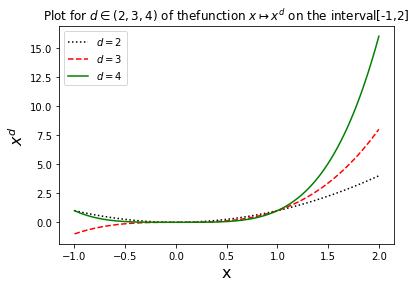

In [17]:
x = np.linspace(-1,2,10_000) # define interval from -1 to 2 
                             # with 10_000 evenly spaced elements
powers = [2, 3, 4]
colors = ["k", "r", "g"]
styles = [':', '--', '-']

# iterate over list elements to create plot
for power, color, style in zip(powers, colors, styles):
    plt.plot(
        x, np.power(x,power), label=f"$d = {power}$", 
             c=color, linestyle=style
    )


plt.legend()
plt.xlabel("x", size = 16) # add x-label x
plt.ylabel("$x^d$", size = 16) # add y-label x^d
_= plt.title(f"Plot for $d \in {2, 3, 4}$ of the" 
             f"function $x \mapsto x^d$ on the interval" 
             f"[-1,2]", size = 12)

## Bonus : Numpy broadcasting

15) Create an array with integers 1, 3, ..., 19. Subtract its mean to it. Observe than you can thus subtract a number to an array, even though they do not have the same shape. Create an array with 3 lines and 4 columns, such that arr[i, j] = 4 * i + j (it thus contains integers from 0 to 11). reshape will help.

In [18]:
numbers = np.arange(1,20,2)
print(numbers)

numbers = numbers - numbers.mean()
print(numbers)

matrix_bc = np.arange(0,12,1).reshape(3,4)
print(matrix_bc)

[ 1  3  5  7  9 11 13 15 17 19]
[-9. -7. -5. -3. -1.  1.  3.  5.  7.  9.]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


16) Now, we subtract vectors to 2D arrays, using broadcasting. Take the previous (3, 4) array, and subtract its column wise mean to it (easy). Subtract its row wise mean to it (technically more challenging the first time, you can add an axis to a 1D array with arr[:, None]).

In [19]:
print(matrix_bc)

matrix_cmean = (
    matrix_bc - matrix_bc.mean(axis=0, keepdims=True)
) # axis=0 calculates column mean
  # keepdims=True ensures that dimension stays the 
  # same as in orginal matrix for broadcasting

print(matrix_bc.mean(axis=0))
print(matrix_cmean)

matrix_rmean = (
    matrix_bc - matrix_bc.mean(axis=1, keepdims=True)
) # axis=1 calculates row mean

print(matrix_bc.mean(axis=1))
print(matrix_rmean)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[4. 5. 6. 7.]
[[-4. -4. -4. -4.]
 [ 0.  0.  0.  0.]
 [ 4.  4.  4.  4.]]
[1.5 5.5 9.5]
[[-1.5 -0.5  0.5  1.5]
 [-1.5 -0.5  0.5  1.5]
 [-1.5 -0.5  0.5  1.5]]


17) Using broadcasting and np.arange, create an array of shape (3, 5) such that arr[i, j] = i * j.

In [20]:
matrix_bc17 = np.arange(0,5,1) * np.arange(0,3,1)[:, np.newaxis]
# second vector stored as column vector for broadcasting

print(matrix_bc17)

[[0 0 0 0 0]
 [0 1 2 3 4]
 [0 2 4 6 8]]


## Bonus : value and reference types

18) Create a variable a equal to 1000. Check the address in memory of the variable with a. Create a second variable b equal to 1000. What is the address in memory of b ? Create a third variable c equal to a. Do a += 1. How does it affect the values of the three variables ? Why ?

In [21]:
a = 1_000
print(hex(id(a))) # check memory address of a

b = 1_000
print(hex(id(b))) # check memory address of b

c = a # pass by value
a += 1

print(a,b,c)

# a is increased by whereas whereas c remains unchanged.
# The value of a is passed by value to c and not by reference
# i.e. the storage location of c is not altered when a
# is later on altered

0x7fdf7c0cc2b0
0x7fdf7c0cc790
1001 1000 1000


19) Do the same with a = np.array([0, 1]). What is going on ?

In [22]:
a = np.array([0, 1])

c = a # pass by reference

a += 1

print(a,c)

# Both a and c are increased by 1.
# when using np arrays the values are passed
# by reference, i.e. the storage location of c is
# altered when a is altered.

[1 2] [1 2]


20) Create two variables equal to 1. Using ==, are they equal ? Using is, are they equal ? Do the same when they are equal to 1000. Medit. What is going on ?

In [24]:
d = 1
e = 1

print(d == e)
print(d is e) # both are equal

f = 1_000
g = 1_000

print(f == g) # equal
print(f is g) # not equal

# "is" turns True if two variables point to the same object in memory, 
# ""=="" turns True if the objects referred to by the variables are equal.
# Python caches smaller integers (-5 to 256) but not larger ones,
# this is why the first "is" evaluation turns True 
# (refers to the same object in memory) and the second False.

True
True
True
False
